# Fitting the transit data

In another notebook, we have detailed our method to extract transit lightvurve from the observational data. We also saved that data into a data file; we now want to retrieve planetary parameters from this data. First, let's visualize this dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import utils as utl
from scipy.optimize import curve_fit as cft
from scipy.optimize import minimize as mz

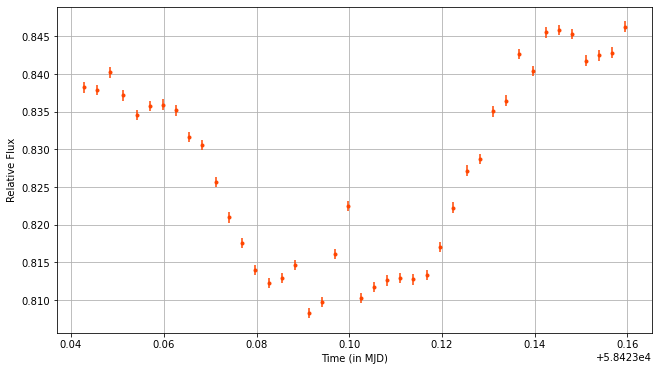

In [2]:
times, rel_fl, rel_fle = np.loadtxt('relative_pho.dat', usecols=(0,1,2), unpack=True)

plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(times, rel_fl, yerr=rel_fle, fmt='.', c='orangered')
plt.xlabel('Time (in MJD)')
plt.ylabel('Relative Flux')
plt.grid()

To retrieve the planetary parameters from this data, we need to normalise this lightcurve such that the out-of-transit values should coinside to $1$. To do this, we can just divide the data with their out-of-transit values; however, how to determine those our-of-transit values is a question here, because, such values, before the transit and after the transit is not exactly the same. What we can do is to take this out-of-transit data points only, and fit a polynomial (maybe a $3^{rd}$ order one) to this data -- then we can divide this polynomial to the relative flux to find the normalised lightcurve. Another question arise here, what points can be considered as the out-of-transit data points. By just looking at the above figure we can say that the first 8 points, and last 9 points _could be considered as the out-of-transit_ points. These points, along with in transit points, are plotted in the figure below.

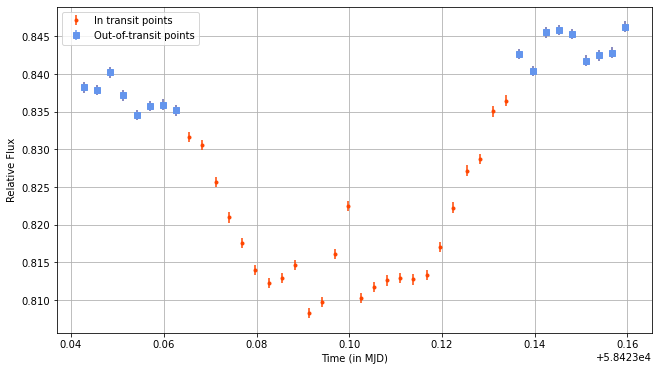

In [3]:
tt_oot, fl_oot, fle_oot = np.hstack((times[0:8], times[-9:])), np.hstack((rel_fl[0:8], rel_fl[-9:])), np.hstack((rel_fle[0:8], rel_fle[-9:]))

plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(times, rel_fl, yerr=rel_fle, fmt='.', c='orangered', label='In transit points')
plt.errorbar(tt_oot, fl_oot, yerr=fle_oot, fmt='.', marker='s', c='cornflowerblue', label='Out-of-transit points')
plt.xlabel('Time (in MJD)')
plt.ylabel('Relative Flux')
plt.legend(loc='best')
plt.grid()

We can now fit a $3^{rd}$ order polynomial to these out-of-transit data points, which is done below:

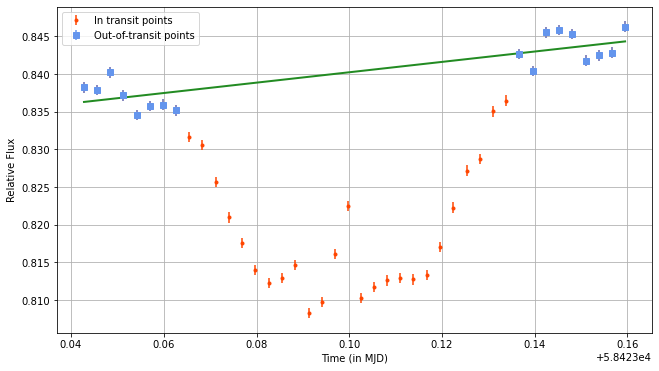

In [4]:
popt, pcov = cft(utl.cubic, xdata=tt_oot, ydata=fl_oot, sigma=fle_oot, p0=np.array([0.84, 1, 0, 0]))

tt1 = np.linspace(np.min(times), np.max(times), 1000)
fl1 = utl.cubic(tt1, *popt)

plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(times, rel_fl, yerr=rel_fle, fmt='.', c='orangered', label='In transit points')
plt.errorbar(tt_oot, fl_oot, yerr=fle_oot, fmt='.', marker='s', c='cornflowerblue', label='Out-of-transit points')
plt.plot(tt1, fl1, c='forestgreen', lw=2)
plt.xlabel('Time (in MJD)')
plt.ylabel('Relative Flux')
plt.legend(loc='best')
plt.grid()

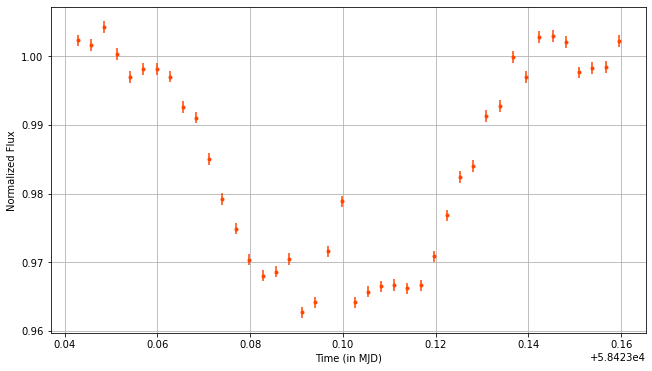

In [5]:
norm_fl, norm_fle = np.zeros(len(rel_fl)), np.zeros(len(rel_fle))

for i in range(len(rel_fle)):
    a1 = np.random.normal(rel_fl[i], rel_fle[i], 10000)
    b1 = utl.cubic(times[i], *popt)
    c1 = a1/b1
    norm_fl[i], norm_fle[i] = np.mean(c1), np.std(c1)

plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(times, norm_fl, yerr=norm_fle, fmt='.', c='orangered')
plt.xlabel('Time (in MJD)')
plt.ylabel('Normalized Flux')
plt.grid()

I would say, the normalized flux looks good!